# Predicting Housing Prices Using the Melbourne Housing Market Dataset
___
The [Melbourne Housing Market Dataset](https://www.kaggle.com/anthonypino/melbourne-housing-market) contains information on properties that have sold in Melbourne, Australia. It was scrapped from [Domain.com.au]() by Tony Pino, and uploaded onto Kaggle.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')

In [87]:
df = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')

In [88]:
df.shape

(52964, 12)

In [5]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52964 entries, 0 to 52963
Data columns (total 12 columns):
Suburb           52964 non-null object
Address          52964 non-null object
Rooms            52964 non-null int64
Type             52964 non-null object
Price            41196 non-null float64
Method           52964 non-null object
SellerG          52964 non-null object
Date             52964 non-null object
Regionname       52964 non-null object
Propertycount    52964 non-null int64
Distance         52964 non-null float64
CouncilArea      52964 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 4.8+ MB


In [8]:
#Looks like there's some missing data
print(df.isnull().sum())

Suburb               0
Address              0
Rooms                0
Type                 0
Price            11768
Method               0
SellerG              0
Date                 0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64


In [89]:
# Drop rows that have missing prices, as imputing the dependent variable seems like a risky move. 
df = df.dropna(axis=0)

# Exploratory Data Analysis

In [12]:
df.describe()

,Rooms,Price,Propertycount,Distance
count,41196.000000,4.119600e+04,41196.000000,41196.000000
mean,3.077580,1.001993e+06,7559.457229,12.748318
std,0.948869,6.033969e+05,4442.485337,7.598925
min,1.000000,8.500000e+04,59.000000,0.000000
25%,2.000000,6.170000e+05,4280.000000,7.000000
50%,3.000000,8.350000e+05,6567.000000,11.700000
75%,4.000000,1.225000e+06,10412.000000,16.700000
max,31.000000,1.120000e+07,21650.000000,54.000000


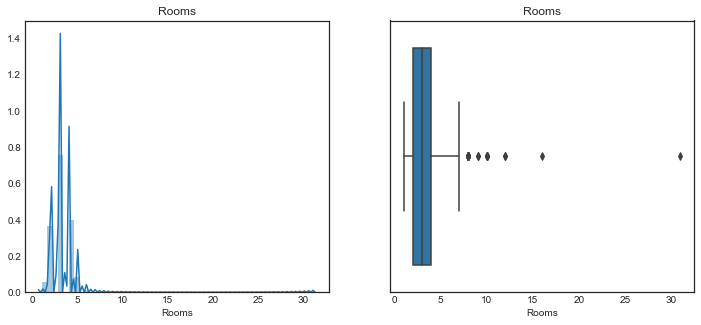

In [13]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['Rooms'])
plt.title('Rooms')

plt.subplot(1, 2, 2)
sns.boxplot(df['Rooms'])
plt.title('Rooms')

plt.show()

In [38]:
#Remove outliers of any number of rooms over 8
df = df[df['Rooms'] < 9 ]

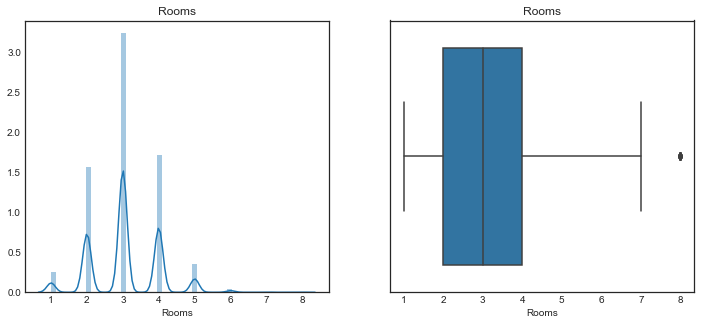

In [39]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['Rooms'])
plt.title('Rooms')

plt.subplot(1, 2, 2)
sns.boxplot(df['Rooms'])
plt.title('Rooms')

plt.show()

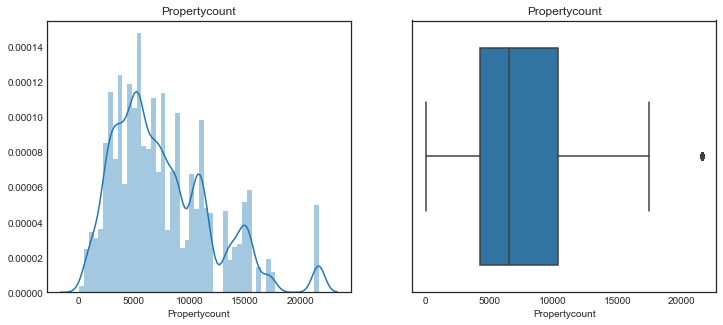

In [14]:
#Number of Properties in the area
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['Propertycount'])
plt.title('Propertycount')

plt.subplot(1, 2, 2)
sns.boxplot(df['Propertycount'])
plt.title('Propertycount')

plt.show()

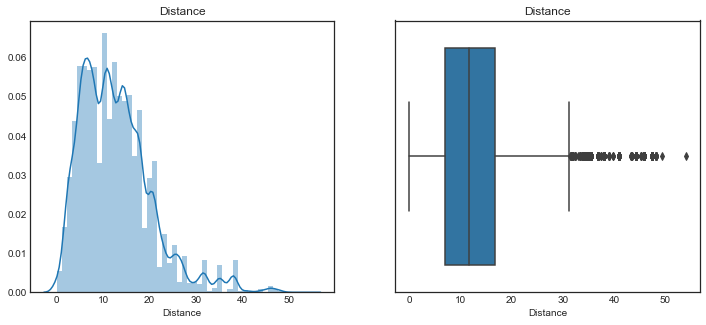

In [15]:
#Distance to the CBD aka Melbourne City Centre
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['Distance'])
plt.title('Distance')

plt.subplot(1, 2, 2)
sns.boxplot(df['Distance'])
plt.title('Distance')

plt.show()

In [20]:
df.Suburb.value_counts()

Reservoir           885
Bentleigh East      587
Richmond            534
Preston             492
Mount Waverley      475
Craigieburn         474
Brunswick           464
Cheltenham          441
Northcote           419
Glenroy             416
Glen Waverley       413
Essendon            412
Mill Park           388
South Yarra         379
Coburg              378
Bundoora            376
Pascoe Vale         369
Kew                 367
Hawthorn            366
Glen Iris           362
Epping              356
Brighton            355
Balwyn North        352
St Kilda            351
Doncaster East      335
Camberwell          334
Hoppers Crossing    332
Thornbury           320
Bentleigh           318
Brighton East       314
                   ... 
Werribee South        2
Tecoma                2
Cranbourne South      2
Lysterfield           2
Kalorama              1
Mount Dandenong       1
Wandin North          1
Warneet               1
Bulla                 1
Park Orchards         1
Coldstream      

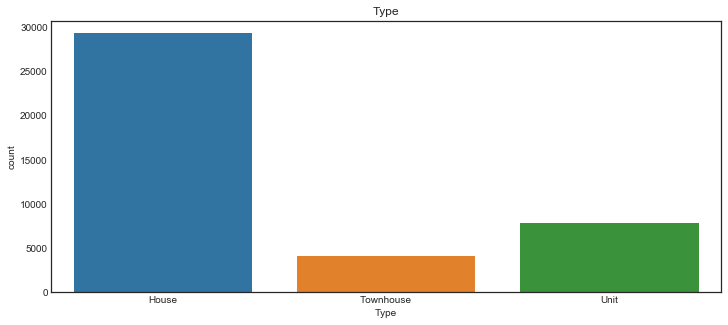

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(x="Type", data=df);
plt.xticks(np.arange(3),('House', 'Townhouse', 'Unit'))
plt.title('Type')


plt.show()

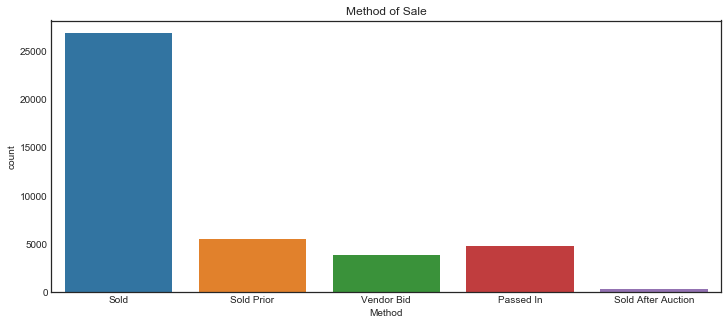

In [32]:
plt.figure(figsize=(12,5))
sns.countplot(x="Method", data=df);
plt.xticks(np.arange(5),('Sold', 'Sold Prior', 'Vendor Bid', 'Passed In', 'Sold After Auction'))
plt.title('Method of Sale')


plt.show()

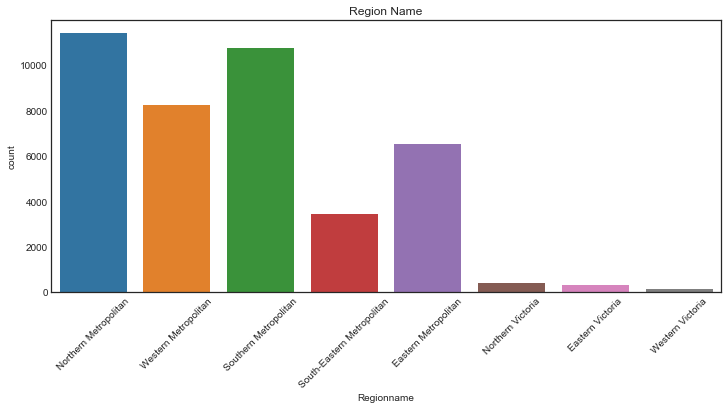

In [31]:
plt.figure(figsize=(12,5))
sns.countplot(x="Regionname", data=df);
plt.xticks(rotation=45)
plt.title('Region Name')


plt.show()

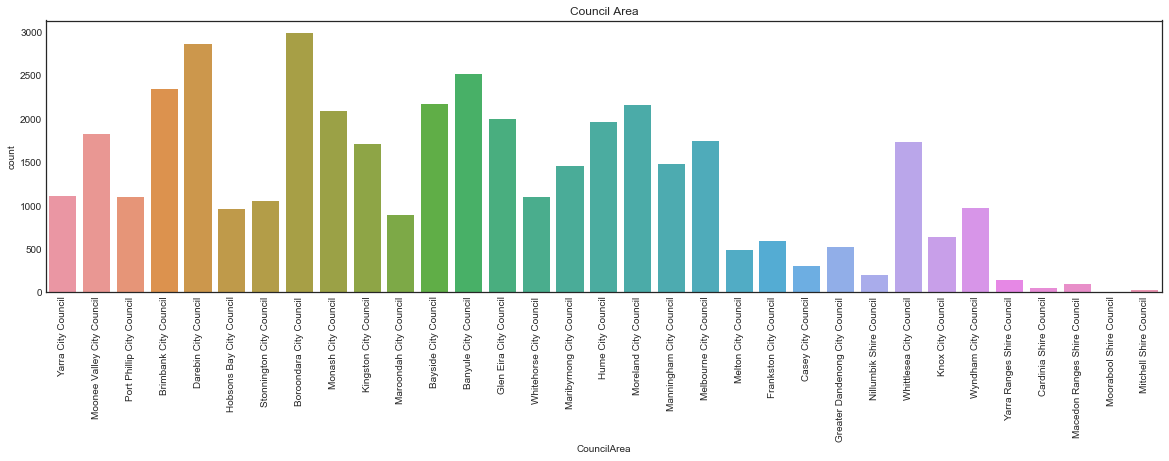

In [43]:
plt.figure(figsize=(20,5))
sns.countplot(x="CouncilArea", data=df);
plt.xticks(rotation=90)
plt.title('Council Area')


plt.show()

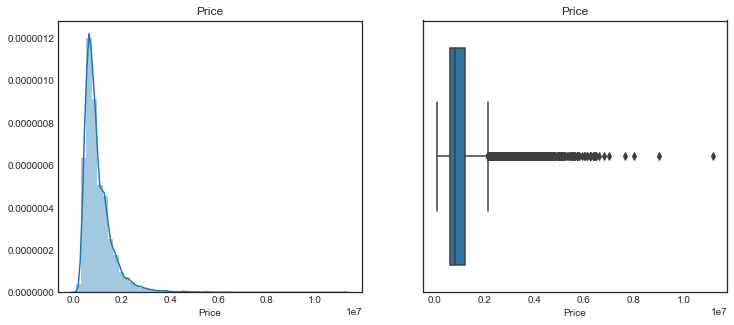

In [40]:
# Explore the distribution of the dependent variable
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['Price'])
plt.title('Price')

plt.subplot(1, 2, 2)
sns.boxplot(df['Price'])
plt.title('Price')

plt.show()

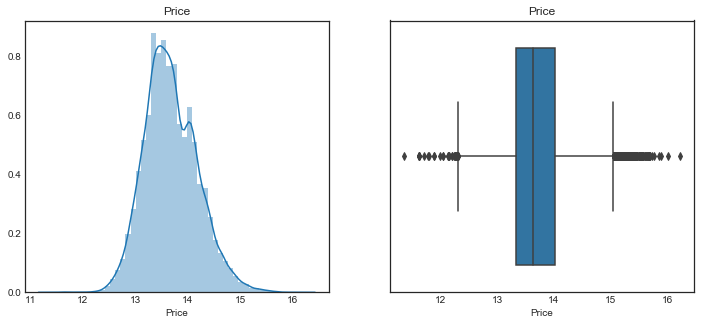

In [90]:
#The dependent variable is not normally distributed. Let's try a log transform to normalize it.
df['Price'] = np.log(df['Price'])

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['Price'])
plt.title('Price')

plt.subplot(1, 2, 2)
sns.boxplot(df['Price'])
plt.title('Price')

plt.show()

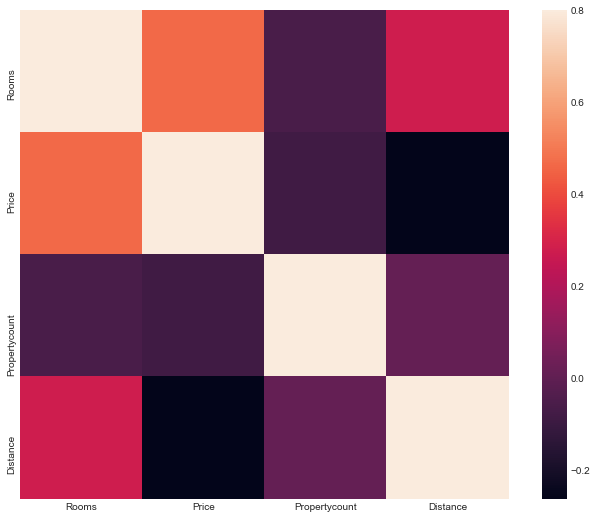

In [44]:
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Feature Engineering and Selection

In [91]:
# Convert date to datetime object
df['Date'] = pd.to_datetime(df['Date'])
len(df['Date'].unique())

91

In [92]:
# Convert date to ordinal
df['Date'] = [x.toordinal() for x in df['Date']]

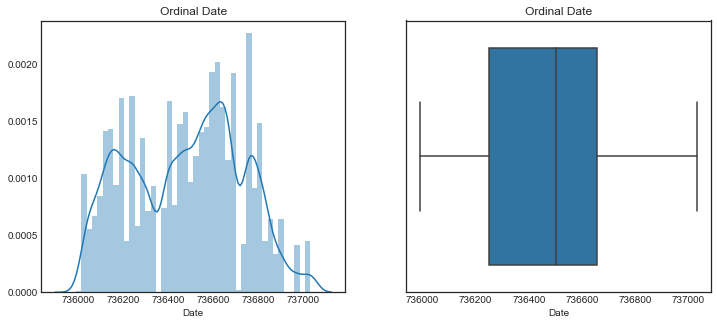

In [72]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['Date'])
plt.title('Ordinal Date')

plt.subplot(1, 2, 2)
sns.boxplot(df['Date'])
plt.title('Ordinal Date')

plt.show()

In [93]:
#Create dummies for Suburb
df = pd.get_dummies(data=df, columns=['Suburb', 'Type', 'Method', 'Regionname', 'CouncilArea'])
X = df.drop(['Address', 'Price', 'SellerG'], axis=1)

In [96]:
y = df['Price'].values.reshape(-1, 1)

# Fit and Tune Model
I will use lasso regression due to its interpretability and feature selection

In [107]:
alphas=[0.000001, 0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5,1]


mx_lambda = []
for i in alphas:
    lass = linear_model.Lasso(alpha=i)
    lass.fit(X, y)
    score = cross_val_score(lass, X, y, cv=10)
    mean_score = score.mean()
    spread = score.max() - score.min()
    mx_lambda.append([i, mean_score, spread])

mx_lambda = pd.DataFrame(mx_lambda)
mx_lambda.columns = ['n_lambda', 'mean_score', 'spread']

Text(0.5,1,'spread')

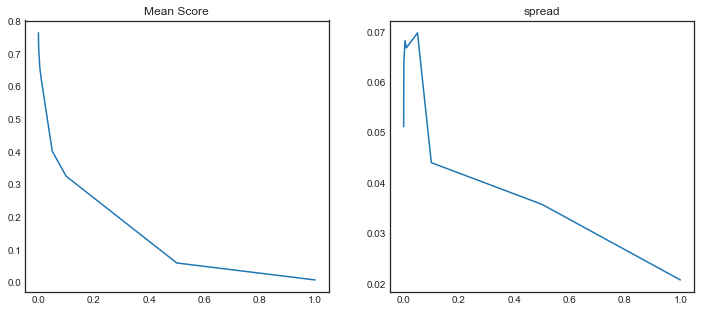

In [108]:
mx_lambda.columns = ['n_lambda', 'mean_score', 'spread']
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(mx_lambda.n_lambda, mx_lambda.mean_score)
plt.title('Mean Score')

plt.subplot(1, 2, 2)
plt.plot(mx_lambda.n_lambda, mx_lambda.spread)
plt.title('spread')

In [109]:
mx_lambda

,n_lambda,mean_score,spread
0,0.000001,0.763703,0.051099
1,0.000010,0.763784,0.051178
2,0.000100,0.759988,0.053425
3,0.000500,0.733407,0.060892
4,0.001000,0.713920,0.064140
5,0.005000,0.658116,0.068185
6,0.010000,0.623308,0.066761
7,0.050000,0.400989,0.069734
8,0.100000,0.324419,0.043967
9,0.500000,0.058230,0.035693


In [110]:
lass = linear_model.Lasso(alpha=0.000010)
lass.fit(X, y)
cross_val_score(lass, X, y, cv=10)

array([0.77015105, 0.74540557, 0.75422431, 0.78008675, 0.76541363,
       0.779839  , 0.77587614, 0.76606049, 0.72890852, 0.77187737])

In [111]:
#Tuning the normalize parameter
lass = linear_model.Lasso(alpha=0.000010, normalize=True)
lass.fit(X, y)
cross_val_score(lass, X, y, cv=10)

array([0.76690501, 0.74166608, 0.75403769, 0.77557886, 0.76347834,
       0.77647871, 0.77286934, 0.76386167, 0.72401586, 0.76903543])

In [116]:
lass = linear_model.Lasso(alpha=0.000010)
lass.fit(X, y)
print(lass.coef_)

[ 2.00310365e-01  2.19631765e-04 -1.09538568e-06 -2.08551622e-02
 -2.01228260e-02  1.91906944e-01 -1.33761171e-01 -1.81355271e-01
  3.42152591e-01  7.45261037e-02  2.56449791e-01  1.02044705e-01
 -2.85937278e-01 -1.23155186e-01 -5.11612199e-02 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  5.70961371e-02  1.22738638e-01
 -5.90889115e-02  8.30503445e-02 -1.88584002e-01 -5.28858190e-03
 -9.58075744e-02  8.82323376e-02  1.29373113e-02  5.11565010e-02
 -7.47197778e-02  3.56110785e-02  2.01086912e-02  2.63598878e-02
 -0.00000000e+00 -0.00000000e+00  2.28005809e-01 -1.00207503e-01
  8.07502778e-02  3.02708193e-02  2.11912316e-01  1.69678233e-01
  1.82765850e-01 -5.24218255e-03  0.00000000e+00  1.58670751e-01
 -7.60275100e-03  2.52182267e-02  1.65108658e-01 -1.37206303e-01
 -2.83086052e-02  2.63286312e-01 -3.27563344e-03 -1.10450521e-01
  0.00000000e+00  1.01607060e-01  1.46033908e-01  1.29762217e-01
 -0.00000000e+00  0.00000000e+00 -5.17938733e-02  8.60334631e-05
 -1.81053709e-01 -2.93363

In [ ]:
# Not as interpretable as I had hoped, let's try RFE
from sklearn.feature_selection import RFE

# Pass any estimator to the RFE constructor
selector = RFE(lass)
selector = selector.fit(X, y)
rankings = pd.DataFrame({'Features': X.columns, 'Ranking' : selector.ranking_})
rankings.sort_values('Ranking')

In [ ]:
# Extract predicted values.
predicted = lass.predict(X).ravel()
actual = y['Price']

# Calculate the error, also called the residual.
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()